<a href="https://colab.research.google.com/github/SuryaSurya1998/JEWELLERY-IMAGE-CLASSIFICATION/blob/main/Image_Classification_MODEL(JEWELLERY).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [1]:
import os
import cv2
import numpy as np
from zipfile import ZipFile
from tqdm import tqdm

In [2]:
import shutil
if(os.path.isdir("data")):
  shutil.rmtree("data", ignore_errors=False, onerror=None)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
root_path = '/content/gdrive/My Drive/data.zip'  #change dir to your project folder

In [5]:
# Uncompress the feature images and labels csv
def uncompress_features_labels(dir,name):
    if(os.path.isdir(name)):
        print('Data extracted')
    else:
        with ZipFile(dir) as zipf:
            zipf.extractall(name)


In [6]:
uncompress_features_labels(root_path,'data')

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
DATADIR = "data/data"
CATEGORIES = ["necklace", "bangles"] # os.listdir("data/data/")
IMG_SIZE = 224

In [9]:
os.listdir("data/data/")

['bangles', 'necklace']

In [10]:
os.listdir("data/data/necklace")

['necklace.13.JPG',
 'necklace.27.JPG',
 'necklace.15.JPG',
 'necklace.18.JPG',
 'necklace.12.JPG',
 'necklace.19.JPG',
 'necklace.9.jpg',
 'necklace.25.JPG',
 'necklace.26.JPG',
 'necklace.17.JPG',
 'necklace.6.jpg',
 'necklace.28.JPG',
 'necklace.11.JPG',
 'necklace.14.JPG',
 'necklace.2.jpg',
 'necklace.7.jpg',
 'necklace.10.JPG',
 'necklace.22.JPG',
 'necklace.5.jpg',
 'necklace.4.jpg',
 'necklace.24.JPG',
 'necklace.23.jpg',
 'necklace.1.jpg',
 'necklace.21.JPG',
 'necklace.3.jpg',
 'necklace.20.JPG',
 'necklace.16.JPG',
 'necklace.8.jpg']

In [11]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) # data/data/aeroplane
        class_num = CATEGORIES.index(category) # 0  

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC) 
                training_data.append([new_array, class_num])
            except Exception as e:  
                pass
              
create_training_data()

100%|██████████| 11/11 [00:00<00:00, 21.06it/s]


In [12]:
print(len(training_data))

# center_image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
# res = cv2.resize(center_image, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

39


In [13]:
print(training_data[0][0].shape)
print(training_data[0][1])

(224, 224, 3)
0


## Shuffle the data or else the order of the image may affect the perfomance of the network

Basic methods for training
To train a model with this dataset you will want the data:

* To be well shuffled.
* To be batched.
* Batches to be available as soon as possible.

In [14]:
import random
random.shuffle(training_data)

In [15]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
1
0
1
1
0


In [16]:
images = []
labels = []

for features,label in training_data:
    images.append(features)
    labels.append(label)


In [17]:
#ip
X = np.array(images)
X = X/255

#op
y = np.array(labels)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31, 224, 224, 3)
(8, 224, 224, 3)
(31,)
(8,)


In [20]:
print(y_train)
print(y_test)

[0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1]


In [21]:
# from sklearn.preprocessing import OneHotEncoder 

# onehotencoder = OneHotEncoder()
# y_train = onehotencoder.fit_transform(y_train).toarray() 
# y_test = onehotencoder.fit_transform(y_test).toarray() 


In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  


In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3), data_format='channels_last'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

model.add(Dense(2, activation='softmax'))

In [24]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
# batch_size = 32
# datagen = ImageDataGenerator()
# datagen.fit(X_train)
# X_batch, y_batch = datagen.flow(X_train, y_train, batch_size=batch_size)
# model.fit_generator(datagen, samples_per_epoch=len(train), epochs=epochs)
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1/1 [==============================] - 0s 138ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.5272 - val_accuracy: 0.8750
Epoch 2/20
1/1 [==============================] - 0s 93ms/step - loss: 3.5992e-04 - accuracy: 1.0000 - val_loss: 2.5614 - val_accuracy: 0.8750
Epoch 3/20
1/1 [==============================] - 0s 104ms/step - loss: 1.1481e-04 - accuracy: 1.0000 - val_loss: 2.5867 - val_accuracy: 0.8750
Epoch 4/20
1/1 [==============================] - 0s 90ms/step - loss: 4.6879e-05 - accuracy: 1.0000 - val_loss: 2.6175 - val_accuracy: 0.8750
Epoch 5/20
1/1 [==============================] - 0s 85ms/step - loss: 2.2659e-05 - accuracy: 1.0000 - val_loss: 2.6568 - val_accuracy: 0.8750
Epoch 6/20
1/1 [==============================] - 0s 91ms/step - loss: 1.2443e-05 - accuracy: 1.0000 - val_loss: 2.7001 - val_accuracy: 0.8750
Epoch 7/20
1/1 [==============================] - 0s 84ms/step - loss: 7.6138e-06 - accuracy: 1.0000 - val_loss: 2.7455 - val_accuracy: 0.8750
E

In [26]:
"""dataAugmentaion = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.1, height_shift_range = 0.1)

#training the model
model.fit_generator(dataAugmentaion.flow(X_train, y_train, batch_size = 32),
validation_data = (X_test, y_test), steps_per_epoch = X_train.shape[0] // 32,epochs = 40)"""

'dataAugmentaion = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, \nfill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, \nwidth_shift_range = 0.1, height_shift_range = 0.1)\n\n#training the model\nmodel.fit_generator(dataAugmentaion.flow(X_train, y_train, batch_size = 32),\nvalidation_data = (X_test, y_test), steps_per_epoch = X_train.shape[0] // 32,epochs = 40)'

In [28]:
predict_test = np.argmax(model.predict(X_test), axis=-1)

In [29]:
CLASS_NAMES = np.array(CATEGORIES)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))
print('Classification Report')
print(classification_report(y_test, predict_test, target_names=CLASS_NAMES))

Confusion Matrix
[[6 0]
 [1 1]]
Classification Report
              precision    recall  f1-score   support

    necklace       0.86      1.00      0.92         6
     bangles       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



In [31]:
# con_mat_df = pd.DataFrame(confusion_matrix(y_test, predict_test), index = CLASS_NAMES, columns = CLASS_NAMES)

con_mat_df = pd.DataFrame(confusion_matrix(y_test, predict_test), index = CLASS_NAMES, columns = CLASS_NAMES)

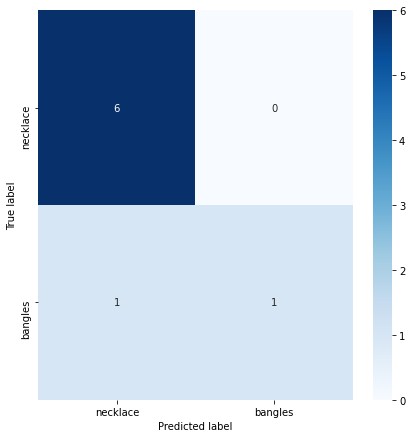

In [32]:
figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
predict_train = np.argmax(model.predict(X_train), axis=-1)
predict_train


array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
# Save the model
model.save('jewellery_model.h5')

In [36]:
# Recreate the exact same model purely from the file
# new_model = keras.models.load_model('path_to_my_model.h5')

In [37]:
model.save('jewellery_model.h5', save_format='tf1')

## Impl Tf Image

In [38]:
import tensorflow as tf
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
image_count = X_train.shape[0]

STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [39]:
CLASS_NAMES

array(['necklace', 'bangles'], dtype='<U8')

In [40]:
train_data_gen = image_generator.flow_from_directory(directory=str(DATADIR),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 39 images belonging to 2 classes.


In [41]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

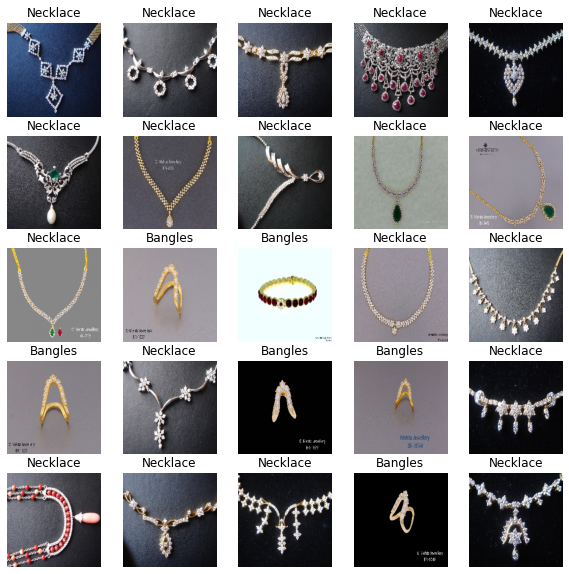

In [42]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)